# Practica 3

## Primera parte

Alumno: Kevin Jafet Moran Orozco

Calcular los pesos de un perceptrón multicapa sin usar un algoritmo de optimización es complicado, implica ver el problema una forma distinta, podemos hacer prueba y error hasta encontrar la configuración correcta pero esto es muy cansado y desde una perspectiva de programador inecesario. En esta practica se implementa un hill climbing, genera pesos aleatorios, y comprueba si son mejores que los anteriores, sino los cambio, en otro caso los guarda, esto proceso nos apoxima a valores de pesos y a respuestas, para una arquotectura sencilla como esta y para este problema es incluso más optimo que usar retropropagación.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función matematica de un perceptron
def perceptron(x, w, b):
    return sigmoid(np.dot(w, x) + b)

# Función de pérdida (error cuadrático)
def loss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

Pesos y bias de la primera neurona a la primera capa: [-14.7409361  -15.58791641] 22.755957756053967
Pesos y bias de la segunda neurona a la primera capa: [16.52560077 13.98589907] -7.072657400567026
Pesos y bias de la primera neurona de la segunda capa - capa salida: [82.81412495 82.69486801] -129.724544532433

Pruebas XOR:
Entrada: [0 0] - Salida esperada: 0 - Salida obtenida: 4.544561612333755e-21
Entrada: [0 1] - Salida esperada: 1 - Salida obtenida: 0.9999999999999998
Entrada: [1 0] - Salida esperada: 1 - Salida obtenida: 0.9999999999999998
Entrada: [1 1] - Salida esperada: 0 - Salida obtenida: 3.924236115042427e-21


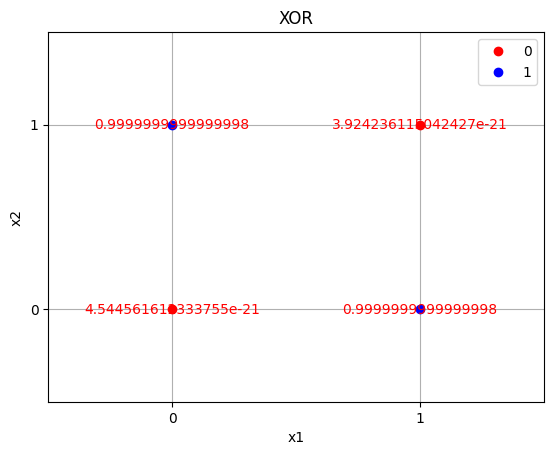

In [ ]:
# Datos de la compuerta XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Inicialización de pesos y sesgos
np.random.seed(4262)
wp1 = np.random.rand(2)
wp2 = np.random.rand(2)
wp3 = np.random.rand(2)

bp1 = np.random.rand()
bp2 = np.random.rand()
bp3 = np.random.rand()

# Tasa de ajuste
step_size = 0.1

# Entrenamiento por búsqueda local
best_loss = float('inf')

for i in range(10000):
    # Almacenamos los pesos y biases actuales
    old_wp1, old_wp2, old_wp3 = wp1.copy(), wp2.copy(), wp3.copy()
    old_bp1, old_bp2, old_bp3 = bp1, bp2, bp3

    # Probar con pequeños ajustes aleatorios
    wp1 += np.random.randn(2) * step_size
    wp2 += np.random.randn(2) * step_size
    wp3 += np.random.randn(2) * step_size

    bp1 += np.random.randn() * step_size
    bp2 += np.random.randn() * step_size
    bp3 += np.random.randn() * step_size

    total_loss = 0

    # Evaluamos en las cuatro entradas
    for j in range(4):
        # Primera capa
        p1 = perceptron(X[j], wp1, bp1)
        p2 = perceptron(X[j], wp2, bp2)
        # Segunda capa
        p3 = perceptron(np.array([p1, p2]), wp3, bp3)
        total_loss += loss(y[j], p3)

    # Si el error es menor, mantenemos los nuevos pesos
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        # Si el error empeora, revertimos los cambios
        wp1, wp2, wp3 = old_wp1, old_wp2, old_wp3
        bp1, bp2, bp3 = old_bp1, old_bp2, old_bp3

    # Si el error es cero, se alcanza la solución
    if best_loss == 0:
        print('Convergencia alcanzada en iteración:', i)
        break

# Resultados finales
print('Pesos y bias de la primera neurona a la primera capa:', wp1, bp1)
print('Pesos y bias de la segunda neurona a la primera capa:', wp2, bp2)
print('Pesos y bias de la primera neurona de la segunda capa - capa salida:', wp3, bp3)

# Prueba del modelo entrenado
print("\nPruebas XOR:")
for j in range(4):
    p1 = perceptron(X[j], wp1, bp1)
    p2 = perceptron(X[j], wp2, bp2)
    p3 = perceptron(np.array([p1, p2]), wp3, bp3)
    print(f"Entrada: {X[j]} - Salida esperada: {y[j]} - Salida obtenida: {p3}")

# Gráfica de los resultados
plt.figure()
plt.title('XOR')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'ro', label='0')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'bo', label='1')
for i in range(2):
    for j in range(2):
        p1 = perceptron([i, j], wp1, bp1)
        p2 = perceptron([i, j], wp2, bp2)
        p3 = perceptron([p1, p2], wp3, bp3)
        plt.text(i, j, p3, color='r', ha='center', va='center')
plt.legend()
plt.show()

## Segunda parte

Esta es una implementación del descenso del gradiente, solo aplicamos la formula de manera iterativa hasta cumplir la toleracia o hasta superar el maximo de iteraciones.

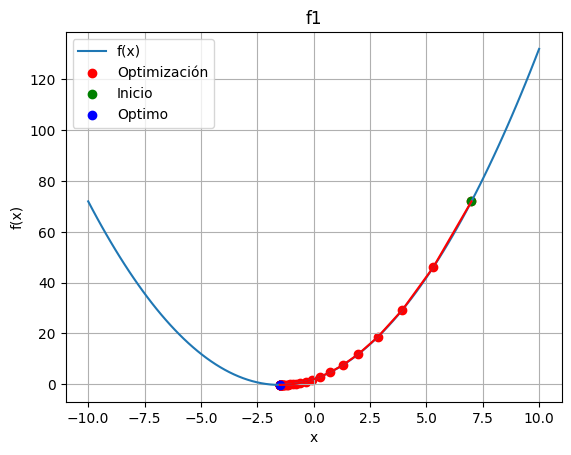

Optimización de f1: (-1.4985876952544783,)


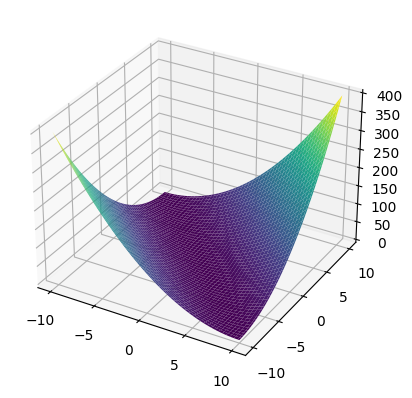

Optimización de f2: (0, 0)
Optimización de f3: (0, 0, 0)
Optimización de f4: (0, 0, 0, 0)


In [ ]:
# Funciones a optimizar
def f1(x):
  return x**2 + 3*x + 2

def f2(x, y):
  return x**2 + y**2 +2*x*y

def f3(x, y, z):
  return x**2 + y**2 + z**2 + x*y + x*z + y*z

def f4(w, x, y, z):
  return w**2 + x**2 + y**2 + z**2 + w*x + w*y + w*z + x*y + x*z + y*z

# Derivadas de las funciones
def df1(x):
  return 2*x + 3

def df2(x, y):
  return 2*x + 2*y, 2*y + 2*x

def df3(x, y, z):
  return 2*x + y + z, 2*y + x + z, 2*z + x + y

def df4(w, x, y, z):
  return 2*w + x + y + z, 2*x + w + y + z, 2*y + w + x + z, 2*z + w + x + y

# Graficamos el proceso de optimización
def plot_optimization(f, df, x0, x_optim, title, register):
  x = np.linspace(-10, 10, 100)
  y = f(x)
  plt.figure()
  plt.plot(x, y, label='f(x)')
  plt.scatter(register, [f(x[0]) for x in register], c='r', label='Optimización')
  plt.plot(register, [f(x[0]) for x in register], c='r')
  plt.scatter(x0, f(x0[0]), c='g', label='Inicio')
  plt.scatter(x_optim, f(x_optim[0]), c='b', label='Optimo')
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.grid(True)
  plt.show()

# Graficamos funciones de  3 variables
def plot_3d_function(f):
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis')
  plt.show()

# Gradiente descendente
def gradient_descent(f, df, x0, lr=0.1, tol=1e-6, max_iterations=100, plot=False):
  x = x0
  register = [x]
  while len(register) < max_iterations:
    grad = df(*x)
    x_new = tuple(x_i - lr * grad_i for x_i, grad_i in zip(x, [grad] if not isinstance(grad, tuple) else grad))
    if abs(f(*x) - f(*x_new)) < tol:
      break
    x = x_new
    register.append(x)

  if plot:
    plot_optimization(f, df, x0, x, f.__name__, register)
  return x

# Optimización de f1
x0 = (7,)
x_optim = gradient_descent(f1, df1, x0, plot=True)
print(f"Optimización de f1: {x_optim}")

# Optimización de f2
x0 = (0, 0)
x_optim = gradient_descent(f2, df2, x0)
plot_3d_function(f2)
print(f"Optimización de f2: {x_optim}")

# Optimización de f3
x0 = (0, 0, 0)
x_optim = gradient_descent(f3, df3, x0)
print(f"Optimización de f3: {x_optim}")

# Optimización de f4
x0 = (0, 0, 0, 0)
x_optim = gradient_descent(f4, df4, x0)
print(f"Optimización de f4: {x_optim}")

## Tercera parte

En este caos usamos la primer función para mostrar tres casos de la tasa de aprendizaje.



1.   Tasa grande
2.   Tasa ideal
3.   Tasa pequeña

Los casos extremos representan un gasto inecesario de recursos.



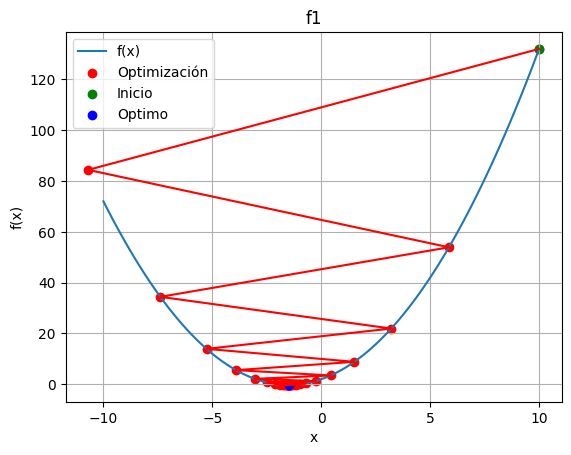

Optimización de f1 con tasa de aprendizaje grande: (-1.4984713878048472,)


In [ ]:
# Probamos una tasa de aprendizaje grande
x0 = (10,)
x_optim = gradient_descent(f1, df1, x0, lr=0.9, plot=True)
print(f"Optimización de f1 con tasa de aprendizaje grande: {x_optim}")

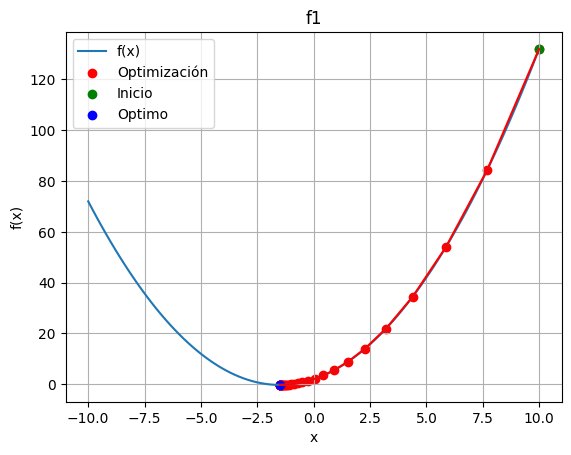

Optimización de f1 con tasa de aprendizaje adecuada: (-1.4984713878048472,)


In [ ]:
# Probamos una tasa de aprendizaje adecuada
x0 = (10,)
x_optim = gradient_descent(f1, df1, x0, lr=0.1, plot=True)
print(f"Optimización de f1 con tasa de aprendizaje adecuada: {x_optim}")

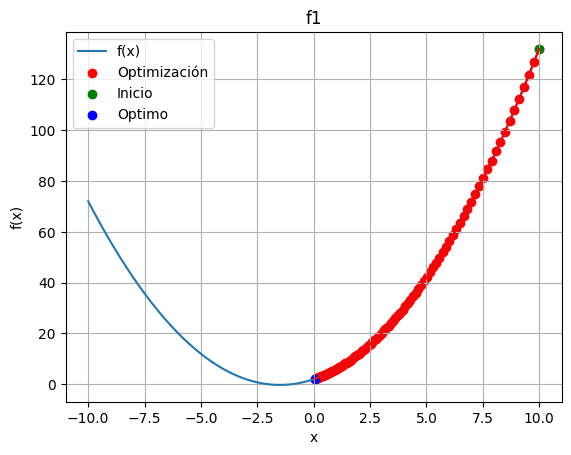

Optimización de f1 con tasa de aprendizaje pequeña: (0.0562498906016951,)


In [ ]:
# Probamos una tasa de aprendizaje pequeña
x0 = (10,)
x_optim = gradient_descent(f1, df1, x0, lr=0.01, plot=True)
print(f"Optimización de f1 con tasa de aprendizaje pequeña: {x_optim}")